# Recovering weak signals

In [1]:
import numpy as np
import corner
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import lightkurve as lk

In [2]:
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

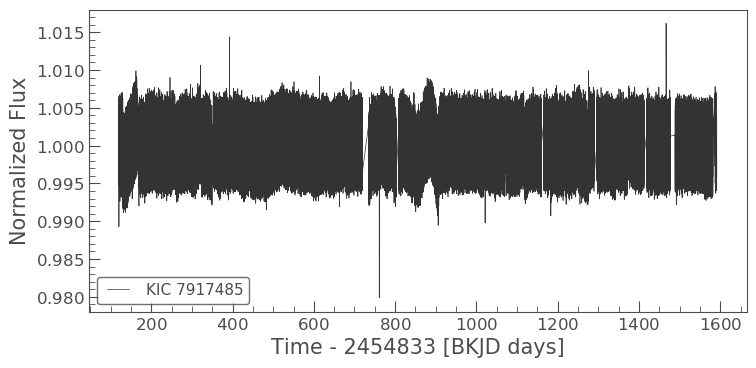

In [3]:
lc = lk.search_lightcurvefile('KIC 7917485', mission='Kepler').download_all().PDCSAP_FLUX.stitch().remove_nans()
lc.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2d4a3358>,
      dtype=object)

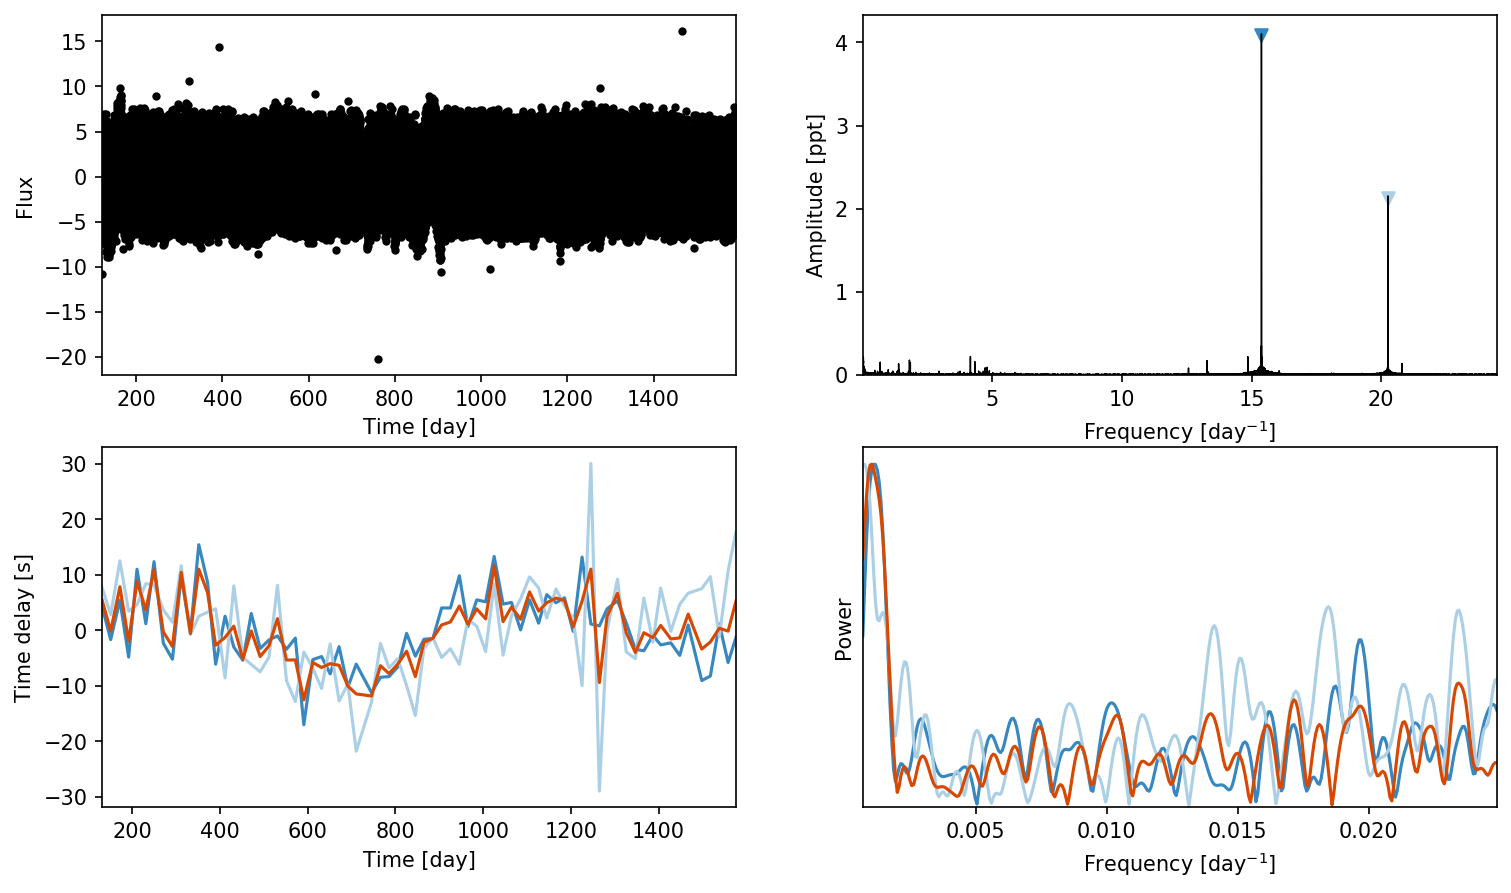

In [10]:
from maelstrom import Maelstrom

ms = Maelstrom(lc.time, lc.flux, max_peaks=2)
ms.first_look(segment_size=20)

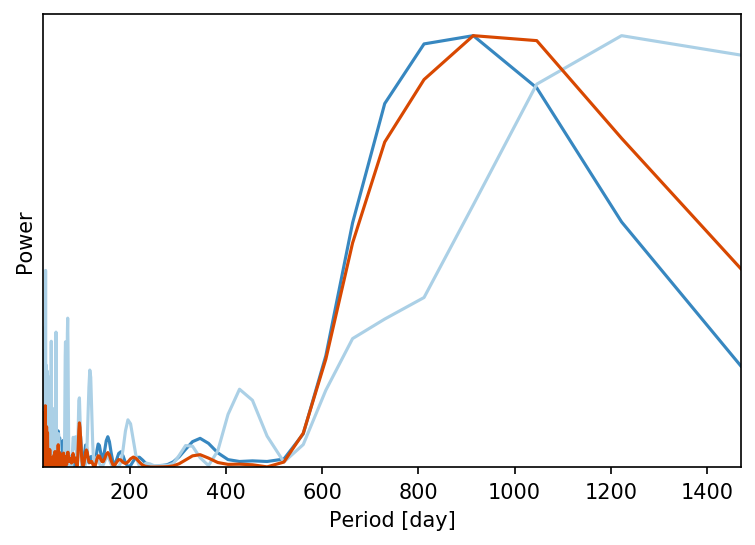

In [11]:
ms.plot_time_delay_periodogram_period()

In [12]:
pg = ms.period_search()

In [14]:
periods = np.linspace(500,1200,200)
pg.fit(periods)

100%|██████████| 200/200 [05:44<00:00,  1.72s/it]


[[(-155083.24647851352,
   {'period': array(500.),
    'nu': array(15.38300258),
    'phi_angle__': array([3.43877157, 2.85915844]),
    'logasini_interval__': array(-2.14332722),
    'drift': array(-7.50477356e-09),
    'phi': array(0.87717196),
    'logasini': array(0.72501325),
    'w': array([ 2.96642259e+00, -2.81303317e+00, -1.01546935e-03]),
    'phase': array(-0.75886393)}),
  (-155083.2754858419,
   {'period': array(503.51758794),
    'nu': array(15.38300258),
    'phi_angle__': array([2.14525483, 3.9240067 ]),
    'logasini_interval__': array(-2.15575762),
    'drift': array(-5.78975417e-09),
    'phi': array(0.50030616),
    'logasini': array(0.71698645),
    'w': array([ 2.96598591e+00, -2.81349443e+00, -1.01575548e-03]),
    'phase': array(-0.7590193)}),
  (-155083.28386496255,
   {'period': array(507.03517588),
    'nu': array(15.38300258),
    'phi_angle__': array([-0.08562281,  4.47131619]),
    'logasini_interval__': array(-2.159895),
    'drift': array(-2.17647397e-09

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c39dd6fd0>,
      dtype=object)

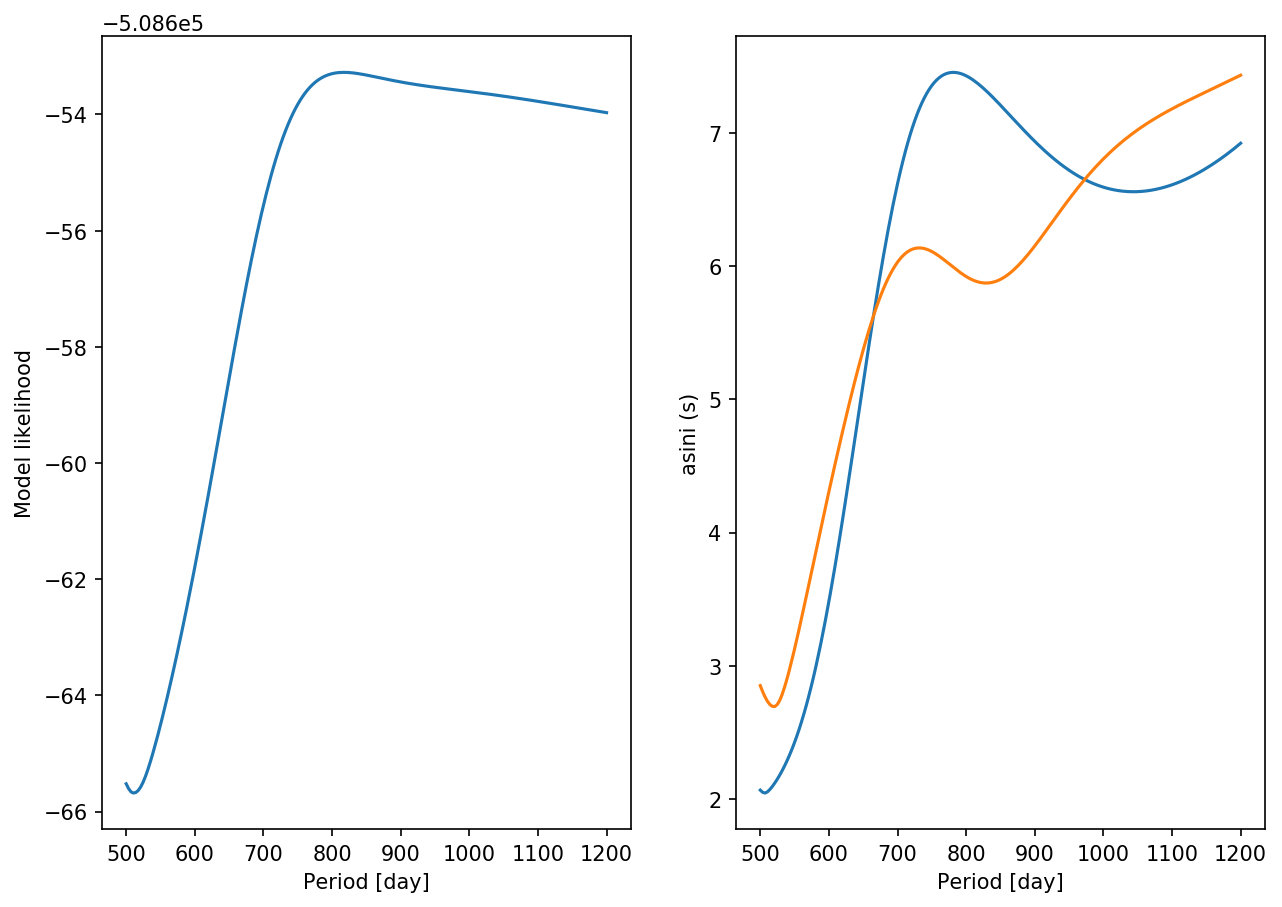

In [15]:
pg.diagnose()